<a href="https://colab.research.google.com/github/pachterlab/MBGBLHGP_2019/blob/master/notebooks/bc_hamming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!date

Fri Feb  5 19:11:45 UTC 2021


# Supplementary Figure 2

In [4]:
import glob
import pandas as pd
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
import itertools
from scipy.optimize import fsolve

from collections import Counter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

In [5]:
v2_names = np.array(['SRR8599150_v2',
       'heart1k_v2', 'SRR8611943_v2',
       'SRR8257100_v2', 'EMTAB7320_v2',
       'SRR7299563_v2', 'SRR8513910_v2',
       'SRR8639063_v2', 'SRR8524760_v2',
       'SRR6956073_v2', 'hgmm1k_v2',
       'SRR8206317_v2', 'SRR8327928_v2',
       'SRR6998058_v2'], dtype=object)

v3_names = np.array(['pbmc_1k_v3', 'hgmm10k_v3',
       'neuron_10k_v3', 'pbmc_10k_v3',
       'heart1k_v3', 'hgmm1k_v3'], dtype=object)

In [6]:
v2_data = {}
v2_data["EMTAB7320_v2"]  = {"n_reads": 335147976}
v2_data["heart1k_v2"]  = {"n_reads": 88872840}
v2_data["hgmm1k_v2"] = {"n_reads": 75225120}
v2_data["SRR6956073_v2"] = {"n_reads": 161274652}
v2_data["SRR6998058_v2"] = {"n_reads": 37227612}
v2_data["SRR7299563_v2"]  = {"n_reads": 112176350}
v2_data["SRR8206317_v2"] = {"n_reads": 85992089}
v2_data["SRR8257100_v2"]  = {"n_reads": 189337914}
v2_data["SRR8327928_v2"] = {"n_reads": 190094560}
v2_data["SRR8513910_v2"]  = {"n_reads": 146617182}
v2_data["SRR8524760_v2"]  = {"n_reads": 97106426}
v2_data["SRR8599150_v2"]  = {"n_reads": 8860361}
v2_data["SRR8611943_v2"]  = {"n_reads": 21574502}
v2_data["SRR8639063_v2"]  = {"n_reads": 416437344}

v2_data["EMTAB7320_v2"]["n_cells"] = 4510
v2_data["heart1k_v2"]["n_cells"] = 712
v2_data["hgmm1k_v2"]["n_cells"] = 1079
v2_data["SRR6956073_v2"]["n_cells"] = 4168
v2_data["SRR6998058_v2"]["n_cells"] = 575
v2_data["SRR7299563_v2"]["n_cells"] = 1660
v2_data["SRR8206317_v2"]["n_cells"] = 4418
v2_data["SRR8257100_v2"]["n_cells"] = 11685
v2_data["SRR8327928_v2"]["n_cells"] = 10396
v2_data["SRR8513910_v2"]["n_cells"] = 726
v2_data["SRR8524760_v2"]["n_cells"] = 3064
v2_data["SRR8599150_v2"]["n_cells"] = 3949
v2_data["SRR8611943_v2"]["n_cells"] = 5194
v2_data["SRR8639063_v2"]["n_cells"] = 6614

In [7]:
v3_data = {}
v3_data["hgmm1k_v3"] = {"n_reads": 63105786}
v3_data["neuron_10k_v3"] = {"n_reads": 357111595}
v3_data["pbmc_10k_v3"] = {"n_reads": 638901019}
v3_data["pbmc_1k_v3"] = {"n_reads": 66601887}
v3_data["heart1k_v3"] = {"n_reads": 84512390}
v3_data["hgmm10k_v3"] = {"n_reads": 721180737}

v3_data["hgmm1k_v3"]["n_cells"] = 1011
v3_data["neuron_10k_v3"]["n_cells"] = 11477
v3_data["pbmc_10k_v3"]["n_cells"] = 1045
v3_data["pbmc_1k_v3"]["n_cells"] = 11790
v3_data["heart1k_v3"]["n_cells"] = 11692
v3_data["hgmm10k_v3"]["n_cells"] = 1227

In [8]:
w = 67365891
c = 345420
u = 2013414

v2_data["heart1k_v2"]["barcode_error_correction"] = (w, c, u)


w = 57345535
c = 176786
u = 1849405
v3_data["heart1k_v3"]["barcode_error_correction"] = (w, c, u)


w = 58523823
c = 358110
u = 2035210
v2_data["hgmm1k_v2"]["barcode_error_correction"] = (w, c, u)



w = 46243317
c = 132278
u = 1394347
v3_data["hgmm1k_v3"]["barcode_error_correction"] = (w, c, u)




w = 499346666
c = 2613284
u = 20298095
v3_data["hgmm10k_v3"]["barcode_error_correction"] = (w, c, u)



w = 227709973
c = 659929
u = 7299697
v3_data["neuron_10k_v3"]["barcode_error_correction"] = (w, c, u)




w = 353379492
c = 1912254
u = 14819352
v3_data["pbmc_10k_v3"]["barcode_error_correction"] = (w, c, u)


w = 39178903
c = 190366
u = 1538993
v3_data["pbmc_1k_v3"]["barcode_error_correction"] = (w, c, u)



w = 28344188
c = 231718
u = 625557
v2_data["SRR6998058_v2"]["barcode_error_correction"] = (w, c, u)



w = 66294966
c = 782287
u = 1728840
v2_data["SRR8206317_v2"]["barcode_error_correction"] = (w, c, u)



w = 111254198
c = 1567548
u = 4904318
v2_data["SRR8327928_v2"]["barcode_error_correction"] = (w, c, u)



w = 348557155
c = 1857224
u = 1836077
v2_data["SRR8639063_v2"]["barcode_error_correction"] = (w, c, u)



w = 258864227
c = 4111830
u = 9256167
v2_data["EMTAB7320_v2"]["barcode_error_correction"] = (w, c, u)




w = 107572180
c = 1082195
u = 2639035
v2_data["SRR6956073_v2"]["barcode_error_correction"] = (w, c, u)



w = 64690144
c = 477618
u = 1520183
v2_data["SRR7299563_v2"]["barcode_error_correction"] = (w, c, u)




w = 173540630
c = 1094514
u = 4191648
v2_data["SRR8257100_v2"]["barcode_error_correction"] = (w, c, u)



w = 131004911
c = 910116
u = 3772762
v2_data["SRR8513910_v2"]["barcode_error_correction"] = (w, c, u)




w = 3420063
c = 38493
u = 117197
v2_data["SRR8599150_v2"]["barcode_error_correction"] = (w, c, u)




w = 16021922
c = 206410
u = 518515
v2_data["SRR8611943_v2"]["barcode_error_correction"] = (w, c, u)




w = 68514365
c = 615351
u = 1748491
v2_data["SRR8524760_v2"]["barcode_error_correction"] = (w, c, u)


In [9]:
# (inwhitelist, correct, uncorrected)
w = [v2_data[i]["barcode_error_correction"][0]/(v2_data[i]["barcode_error_correction"][0] + v2_data[i]["barcode_error_correction"][1] + v2_data[i]["barcode_error_correction"][2]) for i in v2_names]
[w.append(v3_data[i]["barcode_error_correction"][0]/(v3_data[i]["barcode_error_correction"][0] + v3_data[i]["barcode_error_correction"][1] + v3_data[i]["barcode_error_correction"][2])) for i in v3_names]

c = [v2_data[i]["barcode_error_correction"][1]/(v2_data[i]["barcode_error_correction"][0] + v2_data[i]["barcode_error_correction"][1] + v2_data[i]["barcode_error_correction"][2]) for i in v2_names]
[c.append(v3_data[i]["barcode_error_correction"][1]/(v3_data[i]["barcode_error_correction"][0] + v3_data[i]["barcode_error_correction"][1] + v3_data[i]["barcode_error_correction"][2])) for i in v3_names]

u = [v2_data[i]["barcode_error_correction"][2]/(v2_data[i]["barcode_error_correction"][0] + v2_data[i]["barcode_error_correction"][1] + v2_data[i]["barcode_error_correction"][2]) for i in v2_names]
[u.append(v3_data[i]["barcode_error_correction"][2]/(v3_data[i]["barcode_error_correction"][0] + v3_data[i]["barcode_error_correction"][1] + v3_data[i]["barcode_error_correction"][2])) for i in v3_names]

[None, None, None, None, None, None]

In [10]:
nreads = [v2_data[i]["n_reads"] for i in v2_names]
[nreads.append(v3_data[i]["n_reads"]) for i in v3_names]

idx_sorted = np.argsort(nreads)
names = v2_names 
n3 = v3_names
names = np.append(names, n3)
names = names[idx_sorted]


sorted_nreads = np.sort(nreads)

w = np.array(w)[idx_sorted]
c = np.array(c)[idx_sorted]
u = np.array(u)[idx_sorted]

data = [w, c, u]
p = data[1]/(16*data[0] + data[1])
p = p.mean()

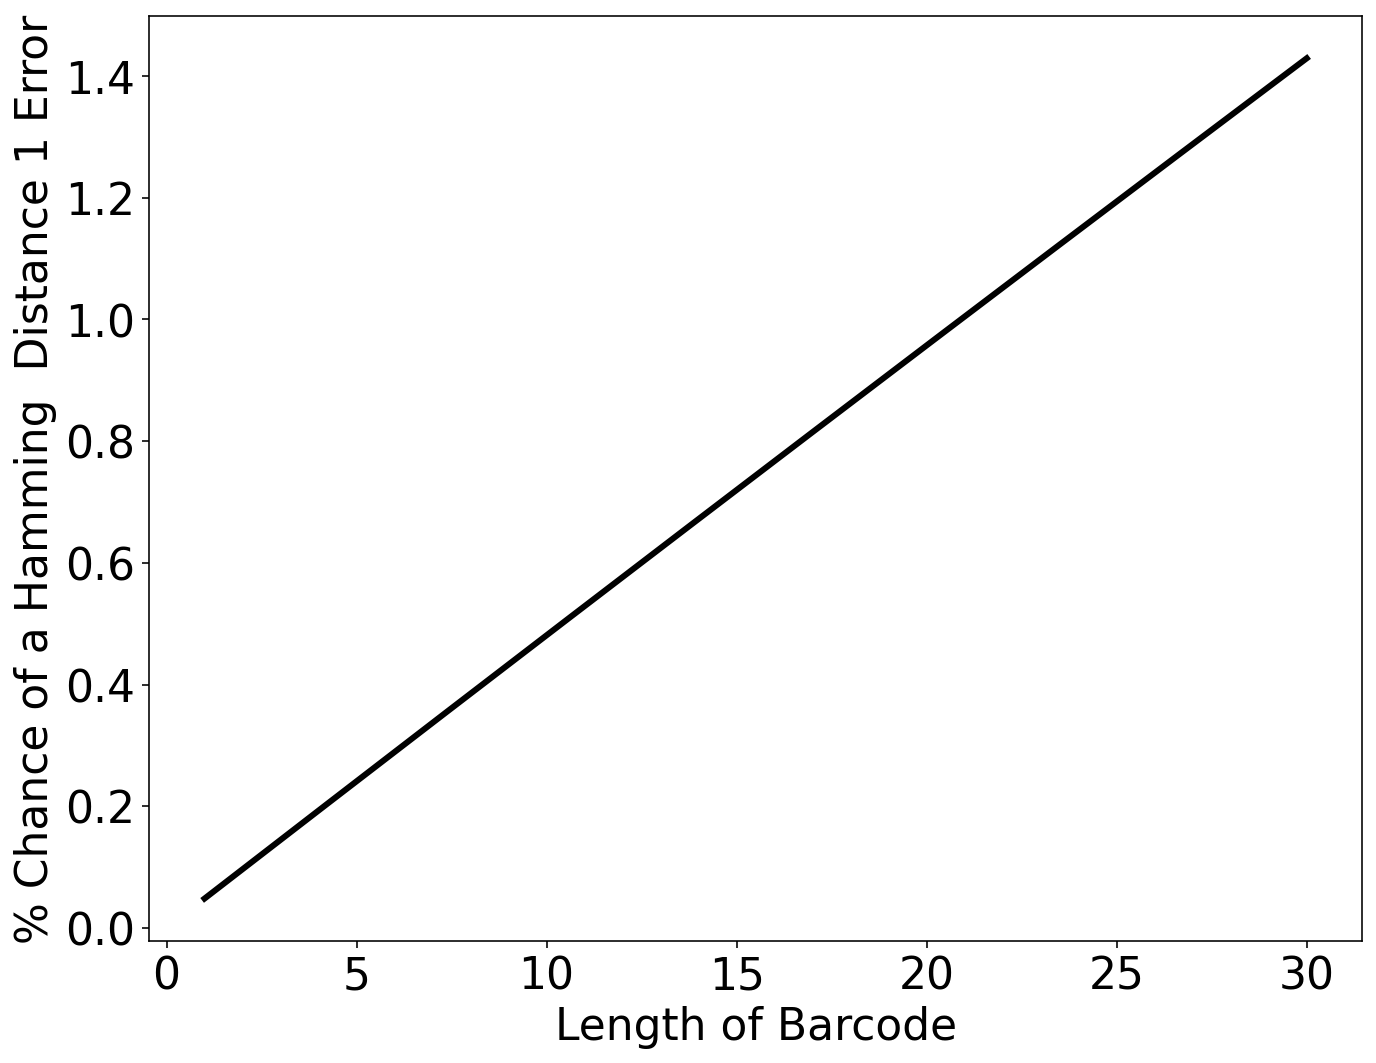

In [11]:
fig, ax1 = plt.subplots(figsize=(10, 8))

L = np.linspace(1, 30, 200)

ax1.plot(L, L*p*(1-p)**(L-1)*100, color="black", linewidth=3)

ax1.set_xlabel('Length of Barcode')
ax1.set_ylabel('% Chance of a Hamming  Distance 1 Error')

plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.1f}'))
plt.tight_layout()
plt.savefig("p_barcode_correct.pdf")
plt.show()